In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression

import mlflow
import mlflow.sklearn

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
mlflow.set_tracking_uri('https://zam10017.zam.kfa-juelich.de/')

In [3]:
#mlflow.set_tracking_uri('http://0.0.0.0:8080')

In [4]:
mlflow.set_experiment('mysimple-newest')

2023/03/10 08:12:09 INFO mlflow.tracking.fluent: Experiment with name 'mysimple-newest' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/3', creation_time=1678432329268, experiment_id='3', last_update_time=1678432329268, lifecycle_stage='active', name='mysimple-newest', tags={}>

In [5]:
X = np.array([-2, -1, 0, 1, 2, 1]).reshape(-1, 1)
y = np.array([0, 0, 1, 1, 1, 0])

In [6]:
mlflow.end_run()

In [7]:

for c in range(1,100, 20):
    with mlflow.start_run():
        C = float(c)/100.0
        mlflow.log_param('C', value=C)
        lr = LogisticRegression(C=C)
        lr.fit(X, y)
        score = lr.score(X, y)
        print(f"{C} score: {score}")
        
        mlflow.log_metric("score", score)
        mlflow.sklearn.log_model(lr, "model")

0.01 score: 0.6666666666666666
0.21 score: 0.6666666666666666
0.41 score: 0.6666666666666666
0.61 score: 0.6666666666666666
0.81 score: 0.6666666666666666


In [8]:
my = lr.predict(X)

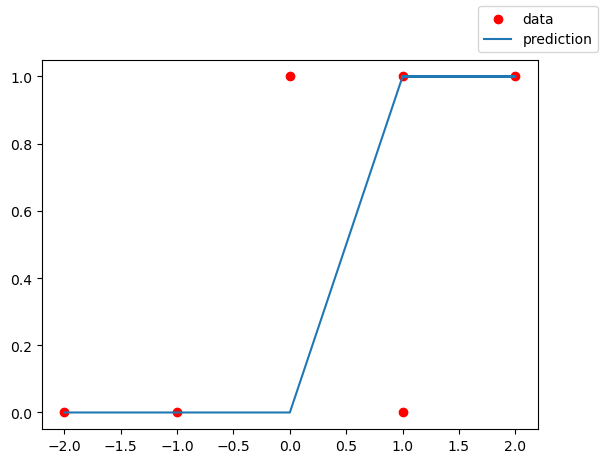

In [9]:
fig, axs = plt.subplots(1)
axs.scatter(X, y,c='r', label='data')
axs.plot(X, my, label='prediction')

fig.legend();

mlflow.log_figure(fig, 'myplot.png')

## Loading model from the repo

In [11]:
mod = mlflow.sklearn.load_model('mlflow-artifacts:/2/72a5223cf23c48ae9a3326fbac8eb6c5/artifacts/model')

In [12]:
mod.predict_proba(X)

array([[0.81845867, 0.18154133],
       [0.69409719, 0.30590281],
       [0.53313875, 0.46686125],
       [0.36497272, 0.63502728],
       [0.22435935, 0.77564065],
       [0.36497272, 0.63502728]])